In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.spatial.distance import hamming
from scipy.spatial.distance import cdist 
%matplotlib inline

# 1) VARIABLE RANKING BY LINEAR CORRELATION COEFFICIENT

Rank the importance of the variables for classifying the species according with their linear correlation coefficient.

In [2]:
leaf_file="data/leaf/leaf.csv"
leaf_points = np.loadtxt(leaf_file,delimiter=',') 

In [3]:
def Linear_Correlation_coefficient(data_points):
    r = list()
    N_features = np.shape(data_points)[1]
    N_points = np.shape(data_points)[0]
    Num=np.zeros((N_features))
    D1=np.zeros(N_features)
    D2=np.zeros(N_features)
    y_mean=data_points[:,0].mean()
    for i in range(N_features-1):
        x_mean=data_points[:,i+1].mean()
        Num[i]=((data_points[:,i+1] - x_mean)*(data_points[:,0]-y_mean)).sum()
        D1[i] = ((data_points[:,i+1] - x_mean)*(data_points[:,i+1] - x_mean)).sum()
        D2[i] = ((data_points[:,0]-y_mean)*(data_points[:,0]-y_mean) ).sum()
        r.append(Num[i]/np.sqrt(D1[i]*D2[i]))
    return r   


In [4]:
var=["Specimen_Number","Eccentricity",  "Aspect_Ratio","Elongation",
                         "Solidity","Stochastic_Convexity", "Isoperimetric_Factor",
                         "Maximal_Indentation_Depth","Lobedness","Average_Intensity",
                         "Average_Contrast","Smoothness","Third_moment","Uniformity",
                         "Entropy"]
res=Linear_Correlation_coefficient(leaf_points)
for i in range(0,15):
    print(res[i],"\t",np.corrcoef(leaf_points[:,0],leaf_points[:,i+1])[0,1])


-0.01514201654732639 	 -0.015142016547326375
0.09141460302089632 	 0.09141460302089631
0.27521011784907834 	 0.27521011784907823
0.1412752472957704 	 0.14127524729577032
0.11184290470599254 	 0.11184290470599254
0.046678319203711044 	 0.04667831920371114
-0.04976661317047232 	 -0.04976661317047221
-0.040025582355131525 	 -0.040025582355131525
-0.017048050594139587 	 -0.017048050594139542
0.1024532189647898 	 0.10245321896478968
0.07624645270769873 	 0.0762464527076986
0.0948852053530928 	 0.09488520535309275
0.05852012269141437 	 0.058520122691414336
0.18771684999019725 	 0.18771684999019717
0.01769003965398187 	 0.01769003965398189


In [5]:
dataset = pd.DataFrame({'Variable': var, 'Linear_correlation_coefficient': res})
dataset=dataset.sort_values(by="Linear_correlation_coefficient",ascending=False)
dataset.reset_index(drop=True)

,Variable,Linear_correlation_coefficient
0,Aspect_Ratio,0.275210
1,Uniformity,0.187717
2,Elongation,0.141275
3,Solidity,0.111843
4,Average_Intensity,0.102453
5,Smoothness,0.094885
6,Eccentricity,0.091415
7,Average_Contrast,0.076246
8,Third_moment,0.058520
9,Stochastic_Convexity,0.046678


# 2) VARIABLE RANKING BY MUTUAL INFORMATION

Rank the importance of the variables for classifying the party of vote according with the mutual information criteria.


In [6]:
voting_file="data/house-votes-84.data"
voting_cols_name = ["Class_Name","handicapped_infants","water_project_cost_sharing",\
                    "adoption_of_the_budget_resolution","physician_fee_freeze","el_salvador_aid",\
                    "religious_groups_in_schools","anti_satellite_test_ban","aid_to_nicaraguan_contras",\
                    "mx_missile","immigration","synfuels_corporation_cutback","education_spending",\
                    "superfund_right_to_sue", "crime","duty_free_exports", "export_administration_act_south_africa"]
voting_cols = ["0","1","2","3","4","5","6","7","8","9","10","11","12", "13", "14","15", "16"]
voting_df = pd.read_csv(voting_file, names=voting_cols_name)# NULL values


In [7]:
def vote_no(series):
    return (series=="n").sum()

def vote_yes(series):
    return (series=="y").sum()

def vote_dont_know(series):
    return (series=="?").sum()


In [8]:
def voting_rank(df,col):
    n_tot = len(df)
    prob=df.groupby(["Class_Name"]).agg(n=(col,vote_no),y=(col,vote_yes),dont_know=(col,vote_dont_know)).reset_index()

    pdn=prob.iloc[0,1]/n_tot
    pdy=prob.iloc[0,2]/n_tot
    pdboh=prob.iloc[0,3]/n_tot
    prn=prob.iloc[1,1]/n_tot
    pry=prob.iloc[1,2]/n_tot
    prboh=prob.iloc[1,3]/n_tot
    pd=prob.iloc[0,1:].sum()/n_tot
    pr=prob.iloc[1,1:].sum()/n_tot
    pn=prob.iloc[:,1].sum()/n_tot
    py=prob.iloc[:,2].sum()/n_tot
    pboh=prob.iloc[:,3].sum()/n_tot
    res= pdn * np.log(pdn/((pd)*(pn)))+prn * np.log(prn/((pr)*(pn)))+\
    pdy * np.log(pdy/((pd)*(py)))+pry * np.log(pry/((pr)*(py)))+\
    pdboh * np.log(pdboh/((pd)*(pboh)))+prboh * np.log(prboh/((pr)*(pboh)))
    return res

res=list()
var=list()
for i in voting_cols_name[1:]:
    var.append(i)
    res.append(voting_rank(voting_df,i))

dataset = pd.DataFrame({'Variable': var, 'Mutual_information': res})
dataset=dataset.sort_values(by="Mutual_information",ascending=False)
dataset=dataset.reset_index(drop=True)
dataset

,Variable,Mutual_information
0,physician_fee_freeze,0.512952
1,adoption_of_the_budget_resolution,0.299661
2,el_salvador_aid,0.292820
3,education_spending,0.259411
4,aid_to_nicaraguan_contras,0.235826
5,crime,0.232401
6,mx_missile,0.215262
7,superfund_right_to_sue,0.157900
8,duty_free_exports,0.152771
9,anti_satellite_test_ban,0.137024


# 3) PCA
Program a PCA and use it to analyze the dataset for radar returns from the ionosphere.

In [9]:
def My_cov(X):
    # Calculate the covariance matrix
    N, M =np.shape(X) 
    cov = np.zeros((M, M))
    for i in range(M):
        mean_i = np.sum(X[:, i]) / N
        for j in range(M):
            mean_j = np.sum(X[:, j]) / N
            cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)
    return cov       


def My_PCA(X , num_components):
    X=X.values
    X_meaned = X - np.mean(X , axis = 0)
    np_cov = np.cov(X_meaned , rowvar = False)
    cov_mat = My_cov(X_meaned )
    #np_cov_diff = np.sum(np.abs(cov_mat - np_cov))
    #print('Difference from numpy cov. mat.: {:.12f}'.format(np_cov_diff))
    #eigen_values , eigen_vectors = np.linalg.eig(cov_mat)
    eigen_values , eigen_vectors = np.linalg.eig(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    plt.plot(sorted_eigenvalue)
    #print(sorted_eigenvalue)
    plt.title("sorted_eigenvalues")
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced

In [10]:
ionosphere_file="data/ionosphere.data"
ionosphere_cols = ["0","1","2","3","4","5","6","7","8","9",\
        "10","11","12", "13", "14","15", "16","17","18","19",\
        "20","21","22","23","24","25","26","27","28","29","30","31","32","33","34"]
ionosphere_df = pd.read_csv(ionosphere_file, names=ionosphere_cols)# NULL values

,PC1,PC2,Target
0,-0.848783,-0.857024,g
1,0.769227,-1.009210,b
2,-1.108933,-0.317884,g
3,0.962416,0.395535,b
4,0.147426,-0.627501,g


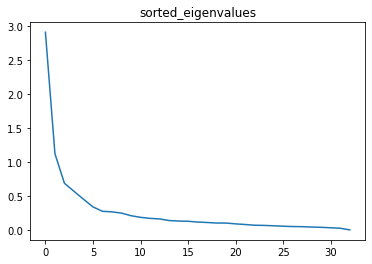

In [11]:
#prepare the data
ionosphere_x = ionosphere_df.iloc[:,0:33]
 
#prepare the target
ionosphere_target = ionosphere_df.iloc[:,34]

#Applying it to PCA function
ionosphere_mat_reduced = My_PCA(ionosphere_x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
ionosphere_principal_df = pd.DataFrame(ionosphere_mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
ionosphere_principal_df = pd.concat([ionosphere_principal_df , pd.DataFrame(ionosphere_target)] , axis = 1)
ionosphere_principal_df=ionosphere_principal_df.rename(columns = {'34':'Target'})
ionosphere_principal_df.head(5)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

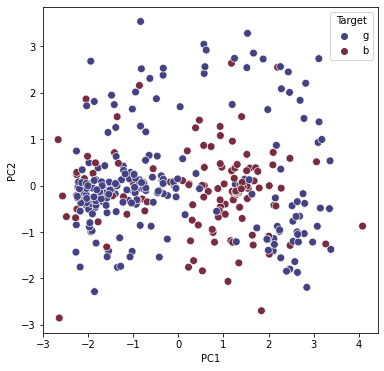

In [12]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = ionosphere_principal_df , x = 'PC1',y = 'PC2' , hue = 'Target' , s = 60 , palette= 'icefire')

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(ionosphere_x)
ionosphere_mat_reduced_sklearn=pca.transform(ionosphere_x)
ionosphere_principal_df_sklearn = pd.DataFrame(ionosphere_mat_reduced_sklearn , columns = ['PC1','PC2'])
ionosphere_principal_df_sklearn = pd.concat([ionosphere_principal_df_sklearn , pd.DataFrame(ionosphere_target)] , axis = 1)
ionosphere_principal_df_sklearn=ionosphere_principal_df_sklearn.rename(columns = {'34':'Target'})
ionosphere_principal_df_sklearn.head(5)


,PC1,PC2,Target
0,-0.848783,-0.857024,g
1,0.769227,-1.009210,b
2,-1.108933,-0.317884,g
3,0.962416,0.395535,b
4,0.147426,-0.627501,g


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

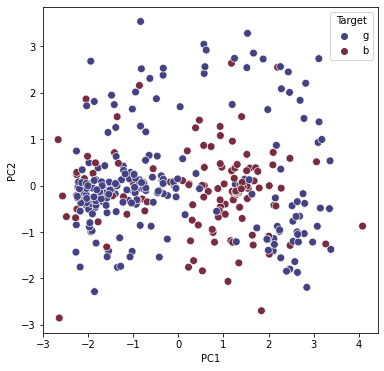

In [14]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = ionosphere_principal_df_sklearn , x = 'PC1',y = 'PC2' , hue = 'Target' , s = 60 , palette= 'icefire')



## 4) DISTANCES AND SIMILARITIES


## Program and compute the Mahalanobis distance for the leaf dataset using the coordinates selected in Point 1.

In [15]:
def My_cov(X):
    # Calculate the covariance matrix
    N, M =np.shape(X) 
    cov = np.zeros((M, M))
    for i in range(M):
        mean_i = np.sum(X[:, i]) / N
        for j in range(M):
            mean_j = np.sum(X[:, j]) / N
            cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)
    return cov       



def calculateMahalanobis(y, data):
    y_mu = y - np.mean(data,axis=0)
    #cov_np= np.cov(data.T)
    cov_mat = My_cov(data)
    inv_covmat = np.linalg.inv(cov_mat)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal


leaf_cols = ["0","1","2","3","4","5","6","7","8","9",\
        "10","11","12", "13", "14","15"]
leaf_df = pd.read_csv(leaf_file, names=leaf_cols) 

# Removing target column
leaf_df_rm = leaf_df.iloc[: , 1:]

# Matrix distance
leaf_dist_rm = calculateMahalanobis(leaf_df_rm .values,leaf_df_rm [leaf_cols[1:]].values)

# Diagonal elements of the atrix distance distance
pd.DataFrame(leaf_dist_rm.diagonal(), columns=["Distance"]).head(5)

,Distance
0,8.478856
1,5.667951
2,7.553296
3,5.401655
4,9.107901


In [16]:
# Same as before but keeping also the target 
leaf_dist_full = calculateMahalanobis(leaf_df.values,leaf_df.values)
pd.DataFrame(leaf_dist_full.diagonal(), columns=["Distance"]).head(5)

,Distance
0,11.595107
1,8.650659
2,10.325920
3,7.859208
4,11.673683


## Program and compute the Euclidean distance in the PCA space between the entries in the ionosphere data set.

In [17]:
def euclidean(X):
    N,M=np.shape(X)
    d=np.empty((N,N))
    for i in range(N):
        for j in range(N):
            d[i,j]=np.linalg.norm(X[i]-X[j])
    return d

In [22]:
# Distance dropping Target column 
ionosphere_principal_df2 = ionosphere_principal_df.drop(columns=["Target"])
d1=euclidean(ionosphere_principal_df2.values)
d2=cdist(ionosphere_principal_df2, ionosphere_principal_df2, 'euclid')
# Check with scipy.spatial.distance
print(d1-d2)
d1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([[0.        , 1.62515114, 0.5986237 , ..., 1.44030444, 1.19583954,
        0.96777555],
       [1.62515114, 0.        , 2.00135397, ..., 2.9550222 , 2.75317881,
        2.45819526],
       [0.5986237 , 2.00135397, 0.        , ..., 0.95377423, 0.7700522 ,
        0.45759607],
       ...,
       [1.44030444, 2.9550222 , 0.95377423, ..., 0.        , 0.27428094,
        0.49708983],
       [1.19583954, 2.75317881, 0.7700522 , ..., 0.27428094, 0.        ,
        0.33266505],
       [0.96777555, 2.45819526, 0.45759607, ..., 0.49708983, 0.33266505,
        0.        ]])

## Program and compute the Hamming distance for the Voting records dataset

In [19]:
def hamming_distance(string1, string2): 
    # Start with a distance of zero, and count up
    distance = 0
    L = len(string1)
    # Loop over the indices of the string
    for i in range(L):
        # Add 1 to the distance if these two characters are not equal
        if string1[i] != string2[i]:
            distance += 1
    # Return the final count of differences
    return distance

In [20]:
filename="data/house-votes-84.data"
cols = ["0","1","2","3","4","5","6","7","8","9","10","11","12", "13", "14","15", "16"]
df = pd.read_csv(filename, names=cols) 

# Distance dropping target variables
df_rm = df.drop(columns=["0"])

df_rm_v = df_rm.values
n,m=np.shape(df)
dist_rm1=np.empty((n,n))
dist_rm2=np.empty((n,n))
for i in range(n):
    for j in range(n):
        dist_rm1[i,j] = hamming(df_rm_v[i],df_rm_v[j])*len(df_rm_v[i])
        dist_rm2[i,j] = hamming_distance(df_rm_v[i],df_rm_v[j])


print(dist_rm1-dist_rm2)
dist_rm1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([[ 0.,  3.,  7., ...,  3.,  6.,  3.],
       [ 3.,  0.,  6., ...,  3.,  6.,  3.],
       [ 7.,  6.,  0., ...,  6., 11.,  7.],
       ...,
       [ 3.,  3.,  6., ...,  0.,  6.,  5.],
       [ 6.,  6., 11., ...,  6.,  0.,  7.],
       [ 3.,  3.,  7., ...,  5.,  7.,  0.]])

In [21]:
# Distance keeping target variables

df_v = df.values
n,m=np.shape(df_v)
dist_1=np.empty((n,n))
dist_2=np.empty((n,n))
for i in range(n):
    for j in range(n):
        dist_1[i,j] = hamming(df_v[i],df_v[j])*len(df_v[i])
        dist_2[i,j] = hamming_distance(df_v[i],df_v[j])


print(dist_1-dist_2)
dist_1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([[ 0.,  3.,  8., ...,  3.,  6.,  3.],
       [ 3.,  0.,  7., ...,  3.,  6.,  3.],
       [ 8.,  7.,  0., ...,  7., 12.,  8.],
       ...,
       [ 3.,  3.,  7., ...,  0.,  6.,  5.],
       [ 6.,  6., 12., ...,  6.,  0.,  7.],
       [ 3.,  3.,  8., ...,  5.,  7.,  0.]])